In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/maulanaakbardj/Home-Agriculture-Monitoring-System

Cloning into 'Home-Agriculture-Monitoring-System'...
remote: Enumerating objects: 55468, done.
remote: Counting objects: 100% (55468/55468), done.
remote: Compressing objects: 100% (55445/55445), done.
remote: Total 55468 (delta 20), reused 55468 (delta 20), pack-reused 0
Receiving objects: 100% (55468/55468), 871.55 MiB | 38.92 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Checking out files: 100% (95070/95070), done.


In [3]:
import os

In [4]:
mypath= '/content/Home-Agriculture-Monitoring-System/ML/Data/Daun/'

In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Bercak Bakteri                          5421
Bercak Daun Abu-Abu                     2052
Bercak Daun Coklat                        40
Bercak Daun Target Spot                 1404
Bercak Kering Alternaria                2000
Bintik daun Septoria                    1771
Busuk Hitam                             2981
Esca (Campak hitam)                     2400
Hangus Daun                             2218
Hawar Daun                              5294
Hawar Daun (Bercak Daun Isariopsis)     2152
Hawar Daun Bakteri                        40
Jamur tepung                            2104
Kapang Daun                              952
Karat Apel Cedar                         275
Karat Daun                              2384
Keropeng Apel                            630
Sehat                                  16027
Smut Daun                                 40
Tungau Laba laba Spider Mite            1676
Virus Kuning Keriting                   3209
Virus Mosaik                             373
dtype:

In [8]:
df.head()

,path,file_name,tag
0,/content/Home-Agriculture-Monitoring-System/ML...,d8b8a834-08df-43d9-8a1a-4bc8e508a1e3___FREC_Sc...,Keropeng Apel
1,/content/Home-Agriculture-Monitoring-System/ML...,4555c009-6c33-4913-accc-fd1a8355646b___FREC_Sc...,Keropeng Apel
2,/content/Home-Agriculture-Monitoring-System/ML...,058d5e64-2c57-45ba-94cb-ac83fd1885a0___FREC_Sc...,Keropeng Apel
3,/content/Home-Agriculture-Monitoring-System/ML...,83b1935d-f1fc-4b9f-876e-c0dbbb2fcb03___FREC_Sc...,Keropeng Apel
4,/content/Home-Agriculture-Monitoring-System/ML...,d7bdef33-fa84-4240-a931-8a568d62cee7___FREC_Sc...,Keropeng Apel


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df['path']
y= df['tag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [13]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [14]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 44354
val size 5544
test size 5545


In [15]:
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)



set         tag                         
test        Bercak Bakteri                   545
            Bercak Daun Abu-Abu              203
            Bercak Daun Coklat                 3
            Bercak Daun Target Spot          132
            Bercak Kering Alternaria         190
                                            ... 
validation  Sehat                           1568
            Smut Daun                          6
            Tungau Laba laba Spider Mite     163
            Virus Kuning Keriting            314
            Virus Mosaik                      36
Length: 66, dtype: int64 




,path,tag,set
46025,/content/Home-Agriculture-Monitoring-System/ML...,Bercak Daun Abu-Abu,test
28655,/content/Home-Agriculture-Monitoring-System/ML...,Sehat,train
55197,/content/Home-Agriculture-Monitoring-System/ML...,Bercak Bakteri,validation


In [16]:
import shutil
from tqdm.notebook import tqdm as tq

In [17]:
datasource_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Daun/"
dataset_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Daun/dataset/"

In [18]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [19]:
import tensorflow as tf

In [20]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
EPOCH = 10

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [23]:
train_generator = train_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Daun/dataset/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Daun/dataset/validation',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Daun/dataset/test',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 44353 images belonging to 22 classes.
Found 5545 images belonging to 22 classes.
Found 5544 images belonging to 22 classes.


In [24]:
print(labels)

dict_keys(['Bercak Bakteri', 'Bercak Daun Abu-Abu', 'Bercak Daun Coklat', 'Bercak Daun Target Spot', 'Bercak Kering Alternaria', 'Bintik daun Septoria', 'Busuk Hitam', 'Esca (Campak hitam)', 'Hangus Daun', 'Hawar Daun', 'Hawar Daun (Bercak Daun Isariopsis)', 'Hawar Daun Bakteri', 'Jamur tepung', 'Kapang Daun', 'Karat Apel Cedar', 'Karat Daun', 'Keropeng Apel', 'Sehat', 'Smut Daun', 'Tungau Laba laba Spider Mite', 'Virus Kuning Keriting', 'Virus Mosaik'])


In [25]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator


In [26]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [27]:
from tensorflow.keras.applications import Xception
# get base models
base_model = Xception(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)


83689472/83683744 [==============================] - 1s 0us/step


In [28]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [29]:
# summarize the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [30]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


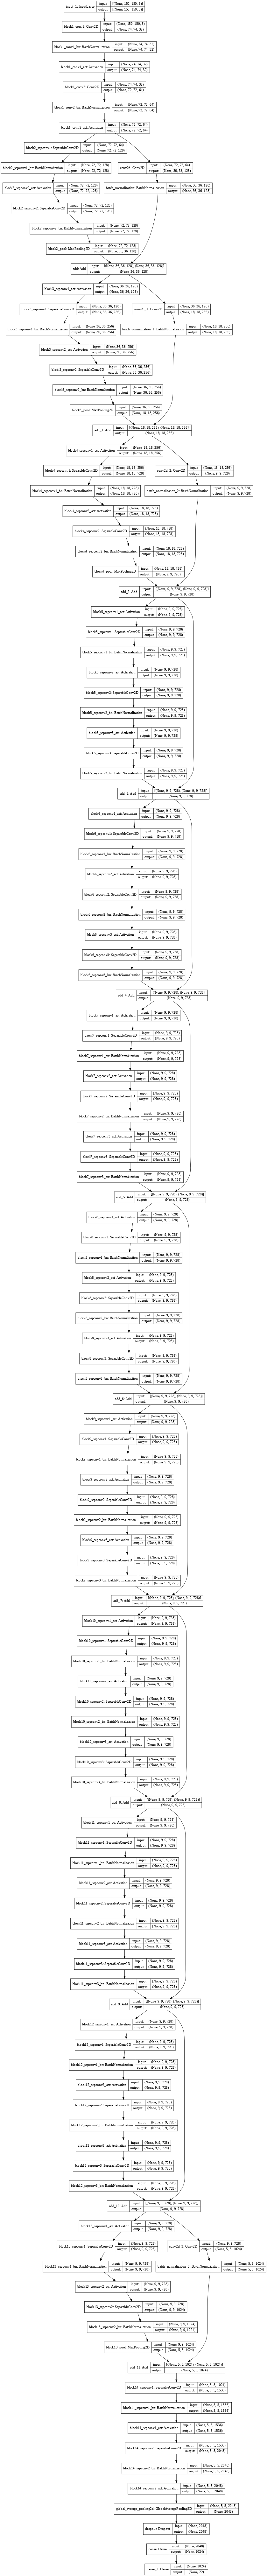

In [31]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model1.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [32]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/20
2773/2773 [==============================] - 692s 236ms/step - loss: 0.4696 - accuracy: 0.8642 - val_loss: 0.5261 - val_accuracy: 0.8662
Epoch 2/20
2773/2773 [==============================] - 650s 234ms/step - loss: 0.2091 - accuracy: 0.9377 - val_loss: 0.1796 - val_accuracy: 0.9493
Epoch 3/20
2773/2773 [==============================] - 658s 237ms/step - loss: 0.1424 - accuracy: 0.9567 - val_loss: 0.4342 - val_accuracy: 0.9100
Epoch 4/20
2773/2773 [==============================] - 649s 234ms/step - loss: 0.1208 - accuracy: 0.9629 - val_loss: 0.1112 - val_accuracy: 0.9663
Epoch 5/20
2773/2773 [==============================] - 644s 232ms/step - loss: 0.1049 - accuracy: 0.9683 - val_loss: 0.1176 - val_accuracy: 0.9677
Epoch 6/20
2773/2773 [==============================] - 645s 233ms/step - loss: 0.0882 - accuracy: 0.9729 - val_loss: 0.1727 - val_accuracy: 0.9598
Epoch 7/20
2773/2773 [==============================] - 648s 234ms/step - loss: 0.0741 - accuracy: 0.9782 - val_

In [33]:
history.history['loss']

[0.4696058928966522,
 0.20910793542861938,
 0.14244157075881958,
 0.12084978818893433,
 0.10487192124128342,
 0.08824837952852249,
 0.07413478195667267,
 0.06886275857686996,
 0.064527228474617,
 0.0620136633515358,
 0.053175415843725204,
 0.055939044803380966,
 0.044809140264987946,
 0.052953921258449554,
 0.04169192537665367,
 0.03989291936159134,
 0.04052995890378952,
 0.037942491471767426,
 0.036964524537324905,
 0.03355021774768829]

In [34]:
history.history['accuracy']

[0.8641805648803711,
 0.9377268552780151,
 0.9567334651947021,
 0.9629111886024475,
 0.9683223366737366,
 0.9728766679763794,
 0.9781525731086731,
 0.9793925881385803,
 0.9808580875396729,
 0.9817374348640442,
 0.9838116765022278,
 0.9832254648208618,
 0.9865849018096924,
 0.9855928421020508,
 0.9877347350120544,
 0.9879827499389648,
 0.9885013699531555,
 0.9889748096466064,
 0.9889522790908813,
 0.990553081035614]

In [35]:
from matplotlib import pyplot as plt

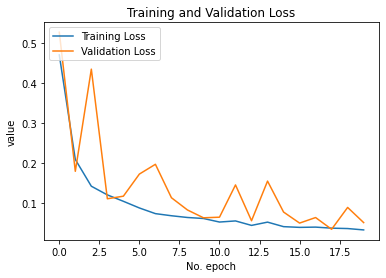

In [36]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

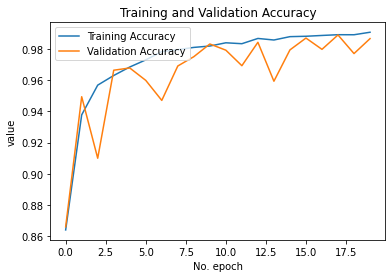

In [37]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [38]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9881 
Loss on training data: 0.0361 

Accuracy on test data: 0.9888 
Loss on test data: 0.0383 



In [42]:
MODEL_BASE_PATH = "/content/drive/MyDrive/"
PROJECT_NAME = "model_project"
SAVE_MODEL_NAME = "Model_Daun_Xception.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/model_project/Model_Daun_Xception.h5...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [43]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [45]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['Bercak Bakteri', 'Bercak Daun Abu-Abu', 'Bercak Daun Coklat', 'Bercak Daun Target Spot', 'Bercak Kering Alternaria', 'Bintik daun Septoria', 'Busuk Hitam', 'Esca (Campak hitam)', 'Hangus Daun', 'Hawar Daun', 'Hawar Daun (Bercak Daun Isariopsis)', 'Hawar Daun Bakteri', 'Jamur tepung', 'Kapang Daun', 'Karat Apel Cedar', 'Karat Daun', 'Keropeng Apel', 'Sehat', 'Smut Daun', 'Tungau Laba laba Spider Mite', 'Virus Kuning Keriting', 'Virus Mosaik']

In [46]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [47]:
from tensorflow.keras.models import load_model

In [48]:
MODEL_PATH = '/content/drive/MyDrive/model_project/Model_Daun_Xception.h5'
model = load_model(MODEL_PATH,compile=False)

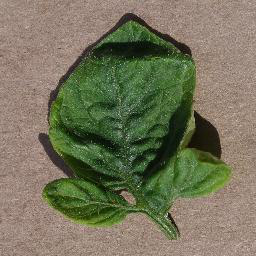

In [49]:
# read image
im = Image.open('/content/Home-Agriculture-Monitoring-System/ML/Data/Tomat/Virus Kuning Keriting/0808b0d2-02be-4845-b713-276f9b9ab890___YLCV_GCREC 5474.JPG')
display(im)

In [50]:
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y)*100 , "%")

Virus Kuning Keriting 99.99971389770508 %


In [51]:
y

array([[9.5408097e-07, 1.0278865e-08, 5.1682678e-14, 2.5642700e-12,
        2.4816245e-08, 4.3138870e-10, 2.4843542e-14, 6.3142373e-11,
        1.9350498e-10, 1.0295877e-06, 2.2934076e-08, 3.5954987e-12,
        2.3319974e-10, 2.5933826e-09, 1.0853625e-15, 1.2244128e-09,
        3.2083098e-18, 1.8953997e-08, 4.1611078e-13, 7.8025181e-07,
        9.9999714e-01, 2.6227769e-09]], dtype=float32)